# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

all_data = []
set_count = 1
record_count = 1

print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    current_data = {}
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city +"&units=imperial"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()     
    
    # Reset record count  and increment set count after every 50 records
    if set_count == 1 and record_count == 51:
        set_count = set_count + 1
        record_count = 1
    elif set_count > 1 and record_count == 50:
        set_count = set_count + 1
        record_count = 0
        
    if "name" in weather_json: 
        current_data['City'] = weather_json["name"]
        current_data['Cloudiness'] = weather_json["clouds"]["all"]
        current_data['Country'] = weather_json["sys"]["country"]
        current_data['Date'] = weather_json["dt"]
        current_data['Humidity'] = weather_json["main"]["humidity"]
        current_data['Lat'] = weather_json["coord"]["lat"]
        current_data['Lng'] = weather_json["coord"]["lon"]
        current_data['Max Temp'] = weather_json["main"]["temp_max"]
        current_data['Wind Speed'] = weather_json["wind"]["speed"]
        
        print(f'Processing Record {record_count} of Set {set_count} | {weather_json["name"]}')
        
        all_data.append(current_data)
    else:
        print(f'City not found. Skipping...')
        
    record_count = record_count + 1
    
                           
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Mahébourg
Processing Record 2 of Set 1 | Chum Phae
Processing Record 3 of Set 1 | Haverfordwest
Processing Record 4 of Set 1 | Guerrero Negro
Processing Record 5 of Set 1 | Mount Gambier
City not found. Skipping...
Processing Record 7 of Set 1 | Huitzó
Processing Record 8 of Set 1 | Chui
Processing Record 9 of Set 1 | Busselton
City not found. Skipping...
Processing Record 11 of Set 1 | Cidreira
Processing Record 12 of Set 1 | Adrar
Processing Record 13 of Set 1 | Ostrovnoy
City not found. Skipping...
Processing Record 15 of Set 1 | Sydney
Processing Record 16 of Set 1 | Jamestown
Processing Record 17 of Set 1 | La Palma
City not found. Skipping...
Processing Record 19 of Set 1 | Dikson
Processing Record 20 of Set 1 | Rosetta
Processing Record 21 of Set 1 | Rikitea
City not found. Skipping...
Processing Record 23 of Set 1 | Mataura
Processing Record 24 of Set 1 | Shache
Processing Record 25 of Set 1 |

Processing Record 7 of Set 5 | Novy Urengoy
Processing Record 8 of Set 5 | Saint-Philippe
Processing Record 9 of Set 5 | Xingyi
Processing Record 10 of Set 5 | Philadelphia
Processing Record 11 of Set 5 | Tezu
Processing Record 12 of Set 5 | Westport
Processing Record 13 of Set 5 | Lianzhou
Processing Record 14 of Set 5 | Mubende
Processing Record 15 of Set 5 | Karratha
Processing Record 16 of Set 5 | Dukat
Processing Record 17 of Set 5 | Altamira
Processing Record 18 of Set 5 | São Félix do Xingu
Processing Record 19 of Set 5 | Sayyan
Processing Record 20 of Set 5 | Somerset
Processing Record 21 of Set 5 | Hualmay
Processing Record 22 of Set 5 | Yangi Marg`ilon
Processing Record 23 of Set 5 | Muisne
Processing Record 24 of Set 5 | Klaksvík
Processing Record 25 of Set 5 | Nouadhibou
Processing Record 26 of Set 5 | Saint-Pierre
Processing Record 27 of Set 5 | Nantucket
Processing Record 28 of Set 5 | Megion
Processing Record 29 of Set 5 | Sistranda
Processing Record 30 of Set 5 | Gannan

Processing Record 12 of Set 9 | Hat Yai
Processing Record 13 of Set 9 | Florø
Processing Record 14 of Set 9 | Hay River
Processing Record 15 of Set 9 | Chernyshevskiy
Processing Record 16 of Set 9 | Mitú
Processing Record 17 of Set 9 | Grand Gaube
Processing Record 18 of Set 9 | Pontianak
Processing Record 19 of Set 9 | Verkhnevilyuysk
Processing Record 20 of Set 9 | San-Pédro
Processing Record 21 of Set 9 | Adelaide
Processing Record 22 of Set 9 | Boyolangu
Processing Record 23 of Set 9 | Pacific Grove
Processing Record 24 of Set 9 | Cabedelo
Processing Record 25 of Set 9 | Haicheng
Processing Record 26 of Set 9 | Saskylakh
Processing Record 27 of Set 9 | Shingū
Processing Record 28 of Set 9 | Nanpiao
Processing Record 29 of Set 9 | Prince Rupert
Processing Record 30 of Set 9 | Santiago
Processing Record 31 of Set 9 | Luganville
Processing Record 32 of Set 9 | Goba
Processing Record 33 of Set 9 | Trelleborg
Processing Record 34 of Set 9 | Bako
Processing Record 35 of Set 9 | Dubai
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
# Building data frame from series of city records
city_data_df = pd.DataFrame(all_data)
city_data_df.head()

# Export city data to csv file
city_data_df.to_csv("../output_data/citydata.csv", index=False, header=True)


In [26]:
city_data_df = pd.read_csv('../output_data/citydata.csv')
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mahébourg,75,MU,1584337043,83,-20.41,57.70,81.00,2.24
1,Chum Phae,100,TH,1584337043,36,16.54,102.10,94.19,5.21
2,Haverfordwest,0,GB,1584337043,80,51.80,-4.97,35.01,3.36
3,Guerrero Negro,0,MX,1584337043,76,27.98,-114.06,59.65,11.81
4,Mount Gambier,15,AU,1584337044,27,-37.83,140.77,77.00,8.05
...,...,...,...,...,...,...,...,...,...
556,Batemans Bay,58,AU,1584337113,55,-35.72,150.18,71.01,1.99
557,Vostok,57,RU,1584337113,83,46.49,135.88,19.72,11.52
558,Inuvik,75,CA,1584337113,76,68.35,-133.72,-4.00,9.17
559,Evensk,100,RU,1584337114,92,61.95,159.23,16.90,21.56


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

/Users/prerakpatel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


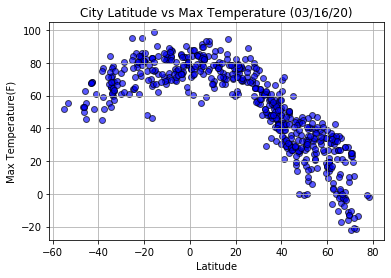

In [29]:
# Latitude vs. Temperature Scatter plot 
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],marker="o", facecolors="blue", edgecolors="black", alpha= 0.65)

# Get formatted todays date
current_date = pd.datetime.now().date().strftime('%m/%d/%y')

plt.title(f'City Latitude vs Max Temperature ({current_date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.grid()

plt.savefig("../Images/lat_temp_plot.png")
plt.show()

#### Latitude vs. Humidity Plot

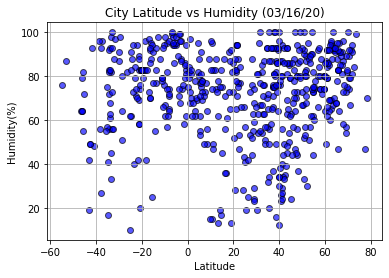

In [31]:
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],marker="o", facecolors="blue", edgecolors="black", alpha= 0.65)

plt.title(f'City Latitude vs Humidity ({current_date})')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()

plt.savefig("../Images/lat_humidity_plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

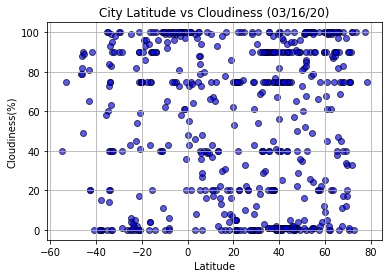

In [32]:
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],marker="o", facecolors="blue", edgecolors="black", alpha= 0.65)

plt.title(f'City Latitude vs Cloudiness ({current_date})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()

plt.savefig("../Images/lat_cloudiness_plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

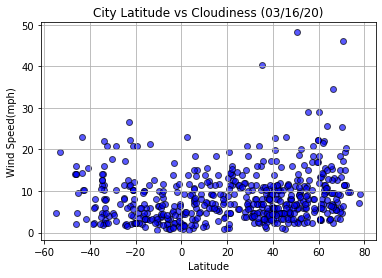

In [33]:
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],marker="o", facecolors="blue", edgecolors="black", alpha= 0.65)

plt.title(f'City Latitude vs Cloudiness ({current_date})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid()

plt.savefig("../Images/lat_windspeed_plot.png")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [34]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = city_data_df.loc[(city_data_df['Lat'] >= 0) & (city_data_df['Lat'] <= 90)]
southern_hemisphere = city_data_df.loc[(city_data_df['Lat'] >= -90) & (city_data_df['Lat'] <= 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [35]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

In [36]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -1.19x +92.24


The r-squared is: -0.8919471951316689


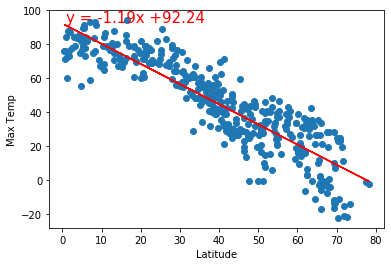

In [37]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(1,93),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("../Images/LinearReg_MaxTemp_Lat_North.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [38]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

In [39]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.45x +82.6


The r-squared is: 0.5642698871776703


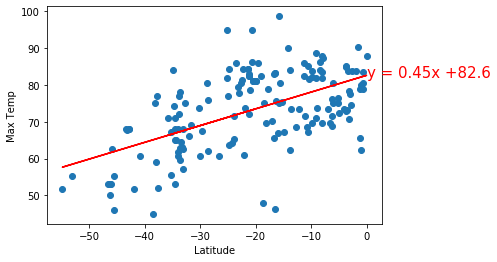

In [40]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(0,82),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("../Images/LinearReg_MaxTemp_Lat_South.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [41]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

In [42]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.21x +62.65


The r-squared is: 0.20520999999290296


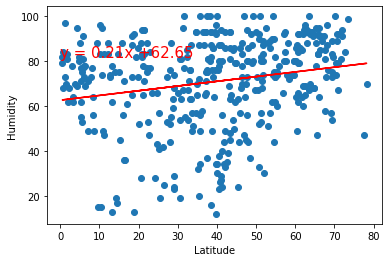

In [43]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(0,82),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.savefig("../Images/LinearReg_Humidity_Lat_North.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression